<h3>K-Nearest-Neighbours</h3>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt # ony pyplot required
sb.set() #seaborn style for graphics


In [3]:
skew_corrected_final_data = pd.read_csv("Assets/skew_Corrected_Final_data.csv")

In [4]:
# Extract Response and Predictors
y = pd.DataFrame(skew_corrected_final_data["price(USD)"])
X = pd.DataFrame(skew_corrected_final_data[["averageDifficulty","cumulative total number of coins","activeAddresses", "Daily Hash Rate(Trillions of hashes/s)"]])

In [58]:
X

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
0,16.125696,11102989.80,83564,4.278455
1,16.125696,11106339.80,81920,4.299074
2,16.125696,11109764.80,82804,4.299074
3,16.125696,11113739.80,69959,4.345594
4,16.125696,11117864.80,72103,4.402392
...,...,...,...,...
2005,29.602320,17330008.54,580054,17.698318
2006,29.602320,17331758.54,560480,17.727306
2007,29.602320,17333583.54,708285,17.769270
2008,29.602320,17335508.54,697601,17.822616


In [59]:
y

,price(USD)
0,4.934474
1,4.756861
2,4.665795
3,4.585987
4,4.726502
...,...
2005,8.776605
2006,8.776886
2007,8.778380
2008,8.754167


In [60]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1608, 1) (1608, 4)
Test Set  : (402, 1) (402, 4)


In [61]:
y_train
y_test

,price(USD)
1283,6.535415
1586,8.430604
1022,6.010433
1377,6.935759
47,4.604170
...,...
296,6.322350
1449,7.100134
1539,7.711334
1192,6.360058


In [62]:
X_train

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
791,24.623257,14239814.80,309194,12.782936
1696,28.256960,16757502.30,1112381,16.484990
1962,29.579784,17277383.54,620772,17.645418
240,20.889562,12182864.80,126405,9.172374
342,22.534783,12621264.80,165204,10.694463
...,...,...,...,...
1805,28.886637,16970002.30,565732,17.169751
1622,27.744350,16613864.80,800806,16.012143
579,24.419618,13667564.80,216010,12.558391
1365,26.697075,16124989.80,711276,14.890563


In [63]:
X_train.describe()

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
count,1608.000000,1.608000e+03,1.608000e+03,1608.000000
mean,25.025641,1.479230e+07,4.322921e+05,13.260418
std,3.270715,1.847615e+06,2.608168e+05,3.217424
min,16.125696,1.110299e+07,4.840200e+04,4.278455
25%,24.034853,1.324304e+07,1.932045e+05,12.331261
50%,25.510758,1.515734e+07,4.425940e+05,13.841366
75%,27.287121,1.641939e+07,6.341232e+05,15.457056
max,29.639235,1.738713e+07,1.283929e+06,17.940485


<p><b>From the above data, we notice that the inpendent variables we are using to predict the price have quite a huge range of values between each other, with the range of around 10^7, hence this cause a hindrance in our ml models</b></p>
<p><b>Hence we peform scaling to tackle this possible issue</b></p>

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)


In [65]:
print (train_scaled)

[[-0.1230647  -0.29911981 -0.47211829 -0.14845092]
 [ 0.98826207  1.06397308  2.60834588  1.00253342]
 [ 1.39283306  1.34544027  0.72287723  1.36331556]
 ...
 [-0.18534537 -0.60893979 -0.829507   -0.21826315]
 [ 0.51118918  0.72152658  1.06998734  0.50681926]
 [-0.13560368 -0.44374307 -0.60359625 -0.1464739 ]]


In [66]:
print(test_scaled)

[[0.37769814 0.62278076 0.44232877 0.29076219]
 [0.76049729 0.93348053 0.59322103 0.76852808]
 [0.20412828 0.23308298 0.41204907 0.17350266]
 ...
 [0.73048551 0.90048856 1.45411962 0.75922579]
 [0.30764072 0.48486417 0.17174443 0.33684357]
 [0.10460152 0.15394286 0.0938533  0.14286603]]


<p><b>The target variable does not need to be scaled as these scaled values will also be able to predict the target variable, the only difference in the model will the individual weights each parameter gets</b></p>

<p><b>We will further explore how scaling affects different types of models and if it neceassary</b></p>

<h3><b> K-Nearest-Neighbours </b></h3>

In [67]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(train_scaled, y_train)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt


In [68]:
mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))



mse =  0.0068770096652184575  & mae =  0.05643339810101095  & rmse =  0.0829277376106358


In [69]:
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))


mse =  0.012612441684287457  & mae =  0.07034583354917329  & rmse =  0.11230512759570445


In [70]:
print (model.predict(train_scaled))

[[5.55692489]
 [9.65174443]
 [8.81771236]
 ...
 [5.86190259]
 [6.85577732]
 [5.50430599]]


In [71]:
print (y_train)

      price(USD)
791     5.573484
1696    9.673949
1962    8.781925
240     6.637625
342     6.103922
...          ...
1805    8.824007
1622    8.436963
579     5.935555
1365    6.793376
690     5.560374

[1608 rows x 1 columns]


In [72]:
print (model.predict(test_scaled))

[[6.42900985]
 [7.91319347]
 [6.02924735]
 [6.96198185]
 [4.67798901]
 [6.23119133]
 [5.93997192]
 [5.56237244]
 [4.74644101]
 [9.46131404]
 [5.80537532]
 [6.7128933 ]
 [9.2003063 ]
 [7.62842069]
 [5.44062607]
 [6.4130273 ]
 [6.58634618]
 [6.40679643]
 [4.83551394]
 [8.34485466]
 [5.47110168]
 [5.55692489]
 [7.97104348]
 [5.47226848]
 [9.06206359]
 [7.88108518]
 [5.45251079]
 [5.612729  ]
 [5.57526981]
 [6.41260806]
 [5.64531571]
 [4.36235349]
 [6.99592836]
 [8.40039801]
 [6.08603659]
 [5.51373376]
 [5.45838301]
 [8.81999975]
 [5.46815125]
 [7.3315496 ]
 [6.99498264]
 [5.4944059 ]
 [6.31318263]
 [8.86971509]
 [7.66351184]
 [6.41128045]
 [6.33313217]
 [6.46721771]
 [6.07934469]
 [5.81042053]
 [8.81381492]
 [6.636584  ]
 [8.99351662]
 [6.22573581]
 [5.51457767]
 [6.20495863]
 [6.08801429]
 [6.39221234]
 [7.43241609]
 [5.49189712]
 [6.19818621]
 [6.11258562]
 [5.83203708]
 [6.04831858]
 [7.10187098]
 [6.15055933]
 [7.94979328]
 [5.45857484]
 [6.04736129]
 [9.05696256]
 [8.13813348]
 [7.87

In [73]:
print (y_test)

      price(USD)
1283    6.535415
1586    8.430604
1022    6.010433
1377    6.935759
47      4.604170
...          ...
296     6.322350
1449    7.100134
1539    7.711334
1192    6.360058
986     6.105195

[402 rows x 1 columns]


<p><b>Applying linear regression in order to compare the results of linear regression with k-nearest neighbours</b></p>


In [74]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(train_scaled, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
y_train_pred = linreg.predict(train_scaled)
y_test_pred = linreg.predict(test_scaled)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_scaled, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_scaled, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [6.73856873]
Coefficients of Regression 	: a =  [[-3.68013236 -0.6024399   0.80559711  4.6882503 ]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7240094741752293
Mean Squared Error (MSE) 	: 0.5250271105648316

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7098304351390816
Mean Squared Error (MSE) 	: 0.4995117947361708



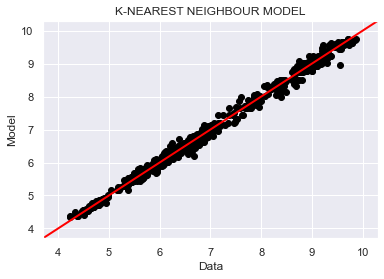

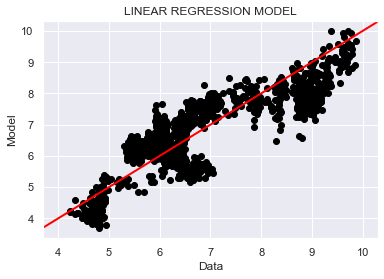

In [75]:
plt.scatter(y_train,model.predict(train_scaled)
,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('K-NEAREST NEIGHBOUR MODEL')
plt.show()



plt.scatter(y_train,linreg.predict(train_scaled)
,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LINEAR REGRESSION MODEL')
plt.show()


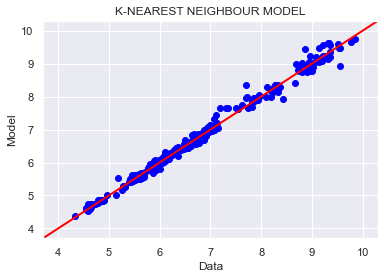

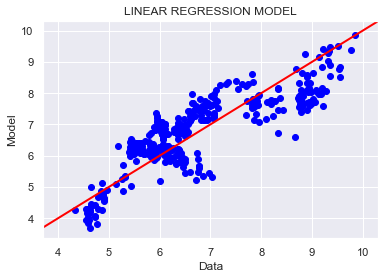

In [76]:
plt.scatter(y_test,model.predict(test_scaled)
,  color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('K-NEAREST NEIGHBOUR MODEL')
plt.show()



plt.scatter(y_test,linreg.predict(test_scaled)
,  color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LINEAR REGRESSION MODEL')
plt.show()


In [82]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)
# instantiate the grid
grid = GridSearchCV(KNeighborsRegressor, param_grid, cv=10, scoring='accuracy')


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [87]:
grid = GridSearchCV(model, param_grid, n_jobs= -1, cv=5)
grid.fit(train_scaled, y_train)
print(grid.best_params_) 


{'n_neighbors': 4}
